# Introduction to k-means clustering with scikit-learn in Python



Here, we train and tune a k-means clustering model using a real-world
CA housing dataset.

K-means clustering is used to group spherical data ("clusters" of data
points) into distinct groups. It won't work well on these data:

![img](kmeansclustering2.png)

A clustering model groups data into distinct clusters or groups to aid
analysis or as a feature in a supervised learning algorithm.

Visualized:

![img](kmeansclustering1.png)

The algorithm sets centroid seeds at random and tries to find points
centering on the seed point by calculating distances. The number of
seeds (`k`) is critical and subject to fine-tuning.

The tutorial follows the typical [machine learning workflow](https://www.datacamp.com/blog/a-beginner-s-guide-to-the-machine-learning-workflow):

![img](mlworkflow.png)



## The dataset



Dataset: CA housing data from Kaggle ([download](https://www.kaggle.com/datasets/camnugent/california-housing-prices?resource=download))

Features:

-  `longitude`: A measure of how far west a house is; a higher value is
    farther west
2.  `latitude`: A measure of how far north a house is; a higher value is
    farther north
3.  `housing_median_age`: Median age of a house within a block; a lower
    number is a newer building
4.  `total_rooms`: Total number of rooms within a block
5.  `total_bedrooms`: Total number of bedrooms within a block
6.  `population`: Total number of people residing within a block
7.  `households`: Total number of households, a group of people residing
    within a home unit, for a block
8.  `median_income`: Median income for households within a block of houses
    (measured in tens of thousands of US Dollars)
9.  `median_house_value`: Median house value for households within a block
    (measured in US Dollars)
10. `ocean_proximity`: Location of the house w.r.t ocean/sea

This dataset could for example be used to visualize the fluctuation of
house prices across California.

For this tutorial, we only use three features: `longitude`, `latitude`,
and `median_house_value`.

We focus on data collection, preparation, hyperparameter tuning,
training, and model evaluation.



## Create data frame



To work with data frame structures, we import the `pandas` library:



In [1]:
# import pandas library as pd
import pandas as pd

Use `pd.read_csv` to download the CSV dataset into a data frame `df`.

Note: we only want three feature vectors, and the dataset already
contains a header row.



In [10]:
# load dataset in dataframe
df = pd.read_csv("housing.csv",
                header=0,
                usecols=['longitude', 'latitude', 'median_house_value'])

In [12]:
# print the dataset (IPython will print head and tail)
print(df)

       longitude  latitude  median_house_value
0        -122.23     37.88            452600.0
1        -122.22     37.86            358500.0
2        -122.24     37.85            352100.0
3        -122.25     37.85            341300.0
4        -122.25     37.85            342200.0
...          ...       ...                 ...
20635    -121.09     39.48             78100.0
20636    -121.21     39.49             77100.0
20637    -121.22     39.43             92300.0
20638    -121.32     39.43             84700.0
20639    -121.24     39.37             89400.0

[20640 rows x 3 columns]


### Visualize the data



We visualize using the `seaborn` library `scatterplot` function:



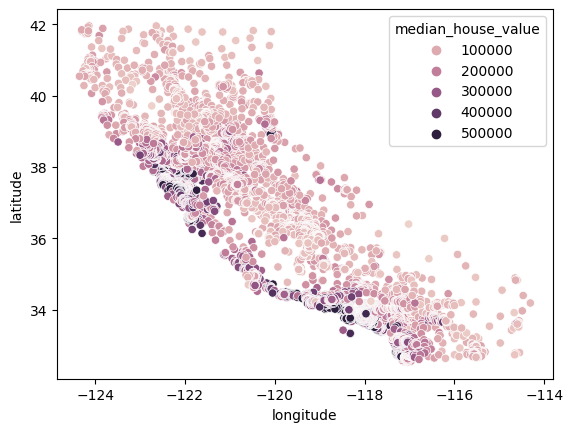

In [17]:
# import seaborn alias sns for plotting
import seaborn as sns
# import matplotlib.pyplot alias plt to save and show plot
import matplotlib.pyplot as plt
# create a scatterplot of all features
sns.scatterplot(data=df,
               x='longitude',
               y='latitude',
               hue='median_house_value')

plt.show()

You can see that most of the expensive houses are on the West coast of
CA showing the higher value of waterfront properties.

Clusters are much easier to spot with reduced number of features.



## Splitting the data



We use `train_test_split` from the `sklearn` package to split the data. We
reserve 33% of the data for testing and shuffle all records before
splitting them up:



In [21]:
# import train_test_split from slkearn.model_selection
from sklearn.model_selection import train_test_split
# split the data frame: first argument predictor list, last target
X_train, X_test, y_train, y_test = train_test_split(
    df[['latitude', 'longitude']], #predictors
    df[['median_house_value']], #target
    test_size=0.33, #split parameter
    random_state=0 #randomize rows
)

# take a look at the .info of these datasets
print(X_train.info(),2)
print(y_train.info(),2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13828 entries, 14069 to 2732
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   latitude   13828 non-null  float64
 1   longitude  13828 non-null  float64
dtypes: float64(2)
memory usage: 324.1 KB
None 2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 13828 entries, 14069 to 2732
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   median_house_value  13828 non-null  float64
dtypes: float64(1)
memory usage: 216.1 KB
None 2


## Normalizing the data



To cluster, the algorithm computes the distance between neighboring
points using one of many possible distance measures. To exclude errors
due to different scales in the feature values, we need to normalize
the data.



In [24]:
# import preprocessing library from sklearn
from sklearn import preprocessing
# normalize training and test dataset X
X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)
# print training and test dataset
print(X_train)
print("Normalized")
print(X_train_norm)

       latitude  longitude
14069     32.76    -117.12
17482     34.44    -119.81
7362      33.97    -118.19
19526     37.65    -120.97
8365      33.97    -118.35
...         ...        ...
13123     38.27    -121.26
19648     37.48    -120.89
9845      36.58    -121.90
10799     33.62    -117.93
2732      32.80    -115.56

[13828 rows x 2 columns]
Normalized
[[ 0.26937372 -0.96303572]
 [ 0.2762676  -0.96108075]
 [ 0.27623513 -0.96109009]
 ...
 [ 0.28741997 -0.95780466]
 [ 0.27416102 -0.9616838 ]
 [ 0.27304949 -0.96199999]]


## Fitting the model



The parameter `k` refers to the number of clusters and to the number of
centroid seeds set. We will:

1.  create an instance of the `KMeans` model
2.  set the `random_state` to `0` to get a repeatable result
3.  set the number of clusters `n_clusters` to `3`
4.  set the number of iterations `n_init` to `10`
5.  fit the model to the normalized training data with `fit`



In [32]:
# import KMeans from sklearn.cluster
from sklearn.cluster import KMeans
# define a k-means clustering model
kmeans = KMeans(n_clusters=3,
               random_state=3,
               n_init=10)
# fit the model to the normalized training data
kmeans.fit(X_train_norm)

KMeans(n_clusters=3, random_state=3)

## Evaluating the model



The model has now generated labels which correspond to one of three
results 0,1,2 for our dataset. They're stored in `kmeans.labels_`:



In [33]:
print(kmeans.labels_)

[1 1 1 ... 0 1 1]


We use `seaborn` to plot the data we just fit as a scatterplot:



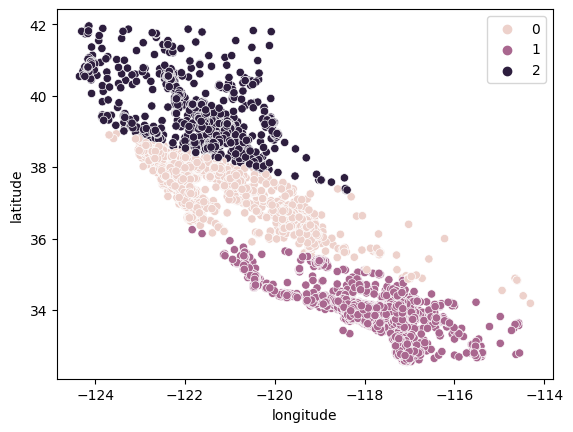

In [34]:
sns.scatterplot(data = X_train,
               x = 'longitude',
               y = 'latitude',
               hue = kmeans.labels_)

plt.show()

The data are split in three distinct groups by location - Northern,
Central and Southern California.

We can look at the distribution of median house prices in these three
groups using the label (or location) as a category:



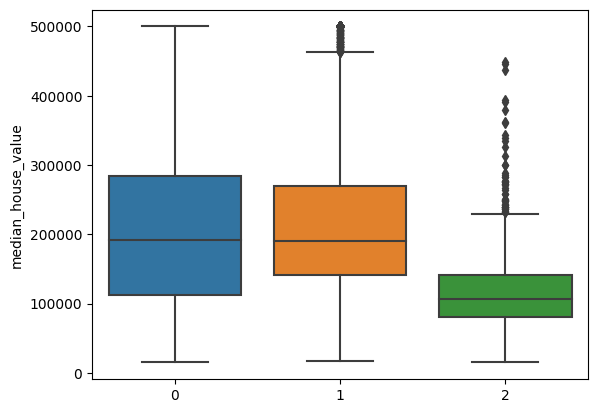

In [36]:
sns.boxplot(x = kmeans.labels_,
           y = y_train['median_house_value'])

plt.show()

House prices are similarly distributed in Northern and Southern
California while Central CA has a lot of outliers (extremely expensive
houses).

Lastly, we compute a Silhouette score, a metric used to calculate the
goodness of a clustering algorithm. Its value ranges from -1 to 1,
where a high value indicates that the object is well matched to its
own cluster and poorly matched to neighboring clusters. If most
objects have a high value, then the clustering configuration is
appropriate. If many points have a low or negative value, then the
clustering configuration may have too many or too few clusters.



In [38]:
# import silhouette_score from sklearn.metrics
from sklearn.metrics import silhouette_score
# print shilouette score
score = silhouette_score(X_train_norm,
                        kmeans.labels_,
                        metric='euclidean')

print(score)

0.7499956340585485


## Choosing the best number of clusters k



The weakness of k-means clustering is that we don't know how many
clusters we need by just running the model. We need to test ranges of
values to decide the best value of k.

The method of choice to determine the optimal k is the "elbow method":
the basic idea is to identify the point where the within-cluster sum
of squares (WCSS) begins to level off.

When it levels off, adding more clusters (increasing k) will not
provide a significant benefit in terms of reducing the variance (aka
spread) of the data.

For example, for the Iris dataset, which contains three species of
iris, the elbow plot shows an 'elbow' at around k=3:

![img](elbow.png)

The optimal k will neither overfit the data (too many clusters), nor
underfit the data (too few clusters).



## Simulate the model for different k



We create a loop over different k, which we store in a list of fits:



In [42]:
# set range for k and initialize fits and score lists
K = range(2,8)
fits = []
score = []
# loop over range of k
for k in K:
    # train the model for current value of k on training data
    model = KMeans(n_clusters=k,
                  random_state=0,
                  n_init=10).fit(X_train_norm)
    # append the model to fits
    fits.append(model)

    # Append the silhouette score to scores
    score.append(silhouette_score(X_train_norm,
                                  model.labels_,
                                  metric='euclidean'))

Look at different values of k by plotting. First, k=2 (first list
element, indexed 0):



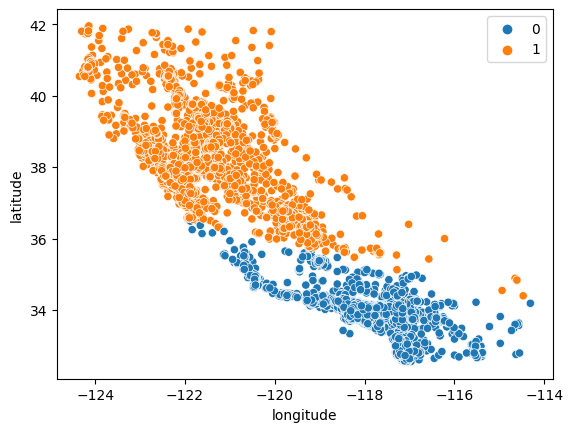

In [43]:
sns.scatterplot(data = X_train,
               x = 'longitude',
               y = 'latitude',
               hue = fits[0].labels_)

plt.show()

The state of CA is split in two halves (which is good) but it does not
capture enough nuance in the housing market. It's underfitted.

Next, k=4 (third list element, indexed 2):



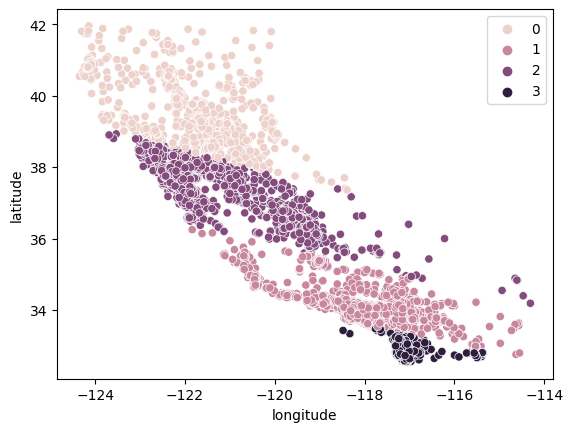

In [44]:
sns.scatterplot(data = X_train,
               x = 'longitude',
               y = 'latitude',
               hue = fits[2].labels_)

plt.show()

This model represents more nuances as you move across the State.

Next, k=7 (6th list element, indexed 5):



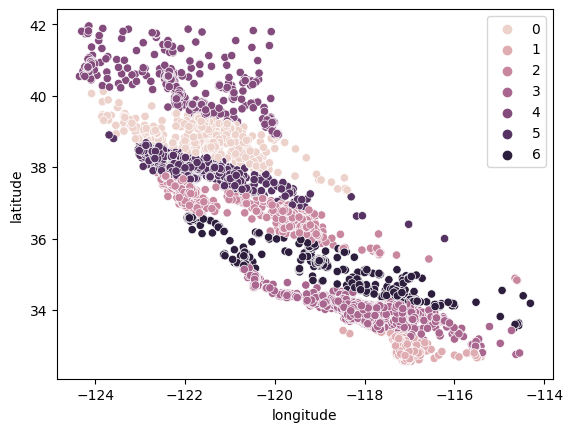

In [45]:
sns.scatterplot(data = X_train,
               x = 'longitude',
               y = 'latitude',
               hue = fits[5].labels_)

plt.show()

This graph appears to have too many clusters. It's overfitted.

The lineplot of the `score` shows the elbow and the optimal k:



<AxesSubplot: >

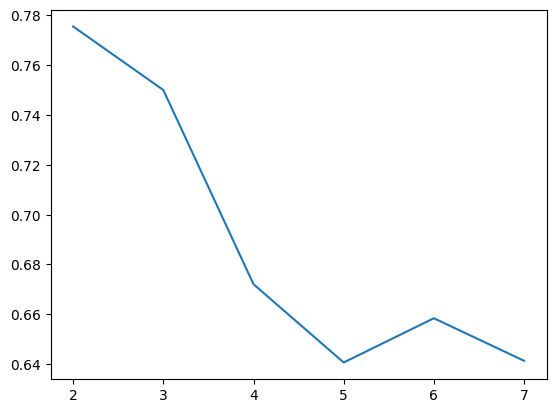

In [46]:
# plot score across k range
sns.lineplot(x=K,
            y=score)

## Final model



The optimal k seems to 5 (4th list element, indexed 3):



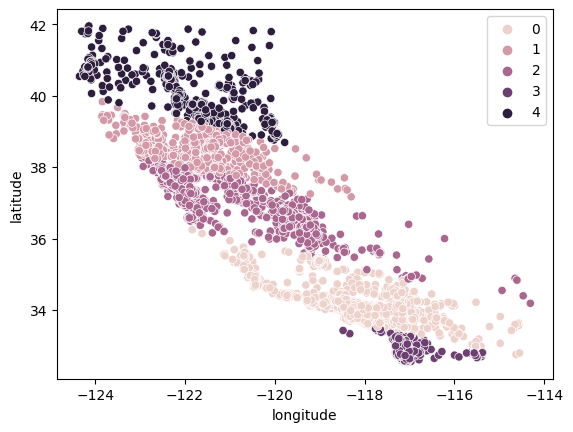

In [47]:
sns.scatterplot(data = X_train,
               x = 'longitude',
               y = 'latitude',
               hue = fits[3].labels_)

plt.show()

The model breaks California into distinct clusters, which map
relatively well to different price ranges as the boxplot shows:



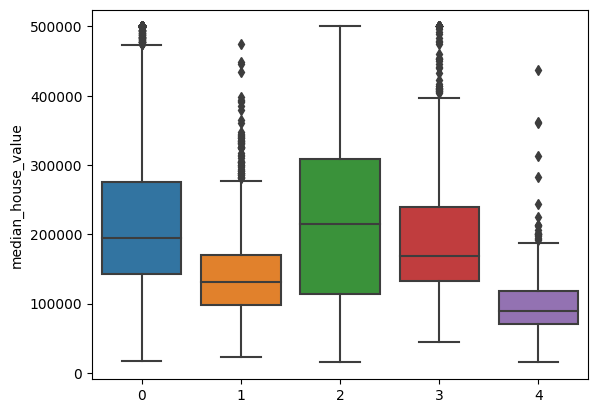

In [48]:
# plot median house value stats for each cluster
sns.boxplot(x = fits[3].labels_,
           y = y_train['median_house_value'])

plt.show()

Further study: check out the DataCamp course []"Unsupervised learning in Python"] (https://app.datacamp.com/learn/courses/unsupervised-learning-in-python)

## References
Kevin Babitz, [@DataCamp, March 2023](https://app.datacamp.com/learn/tutorials/k-means-clustering-python)

